In [1]:
import torch

# Handle Tensor

In [2]:
x = torch.Tensor([5, 3])
y = torch.Tensor([2, 1])

print(x*y)

tensor([10.,  3.])


In [3]:
x = torch.zeros([2, 5])

In [4]:
x.shape

torch.Size([2, 5])

In [5]:
y = torch.rand([2, 5])
y

tensor([[0.3080, 0.0838, 0.4681, 0.0148, 0.4307],
        [0.8786, 0.3138, 0.0097, 0.2268, 0.2521]])

In [6]:
y = y.view([1, 10])
y

tensor([[0.3080, 0.0838, 0.4681, 0.0148, 0.4307, 0.8786, 0.3138, 0.0097, 0.2268,
         0.2521]])

# Use Torch vision

In [7]:
import torch

In [8]:
import torchvision

In [9]:
from torchvision import transforms, datasets

In [10]:
train = datasets.MNIST(
    "",
    train=True,
    download=True,
    transform=transforms.Compose([transforms.ToTensor()])
)

test = datasets.MNIST(
    "",
    train=False,
    download=True,
    transform=transforms.Compose([transforms.ToTensor()])
)

In [11]:
trainset = torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)
testset = torch.utils.data.DataLoader(test, batch_size=10, shuffle=False)

In [12]:
for imgs, labels in trainset:
    print(imgs.shape)
    print(labels.shape)
    break

img, label = imgs[0], labels[0]

torch.Size([10, 1, 28, 28])
torch.Size([10])


In [13]:
from matplotlib import pyplot as plt

Text(0.5, 1.0, 'label = 4')

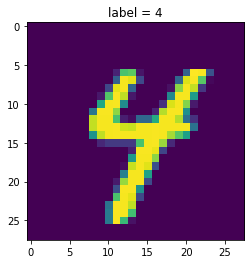

In [14]:
plt.imshow(img.view(28, 28))
plt.title("label = {}".format(label))

# Define your Network

In [15]:
import torch.nn as nn
import torch.nn.functional as F

In [16]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28*28, 128)
        self.fc2 = nn.Linear(128, 128)
        self.fc3 = nn.Linear(128, 10)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        y = F.log_softmax(x, dim=1)
        return x


net = Net()

In [17]:
net(imgs.view(-1, 28*28));

In [18]:
X = torch.rand((28,28))
X = X.view((-1,28*28))
output = net(X)

In [27]:
import torch.optim as optim
optimizer=optim.Adam(net.parameters())

In [28]:
EPOCHS = 3
for e in range(EPOCHS):
    for data in trainset:
        X,y = data
        net.zero_grad()
        output = net(X.view(-1,28*28))
        loss = F.nll_loss(output,y)
        loss.backward()
        optimizer.step()
    print(loss)

tensor(-4.7606e+08, grad_fn=<NllLossBackward>)
tensor(-2.4140e+09, grad_fn=<NllLossBackward>)
tensor(-7.1190e+09, grad_fn=<NllLossBackward>)
